In [55]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/berkayalan/bank-marketing-data-set

In [56]:
df = pd.read_csv("bank_marketing_dataset.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## We check the dimensions

In [57]:
df.shape

(41188, 21)

## We check the columns

In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [59]:
# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

# Data dictionnary

# Data Exploration

## Describe the data

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## Dealing with missing values

In [61]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [62]:
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Looking at categorical/non-numerical columns

Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64




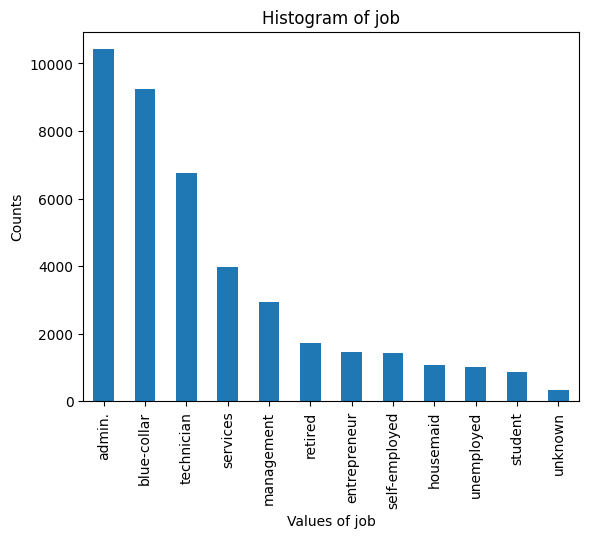

Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64




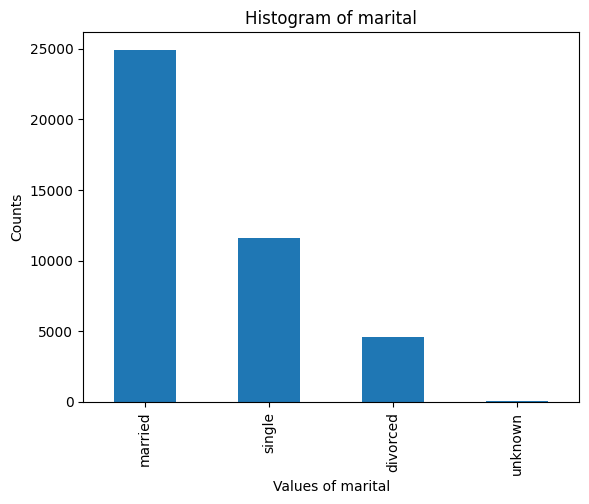

Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64




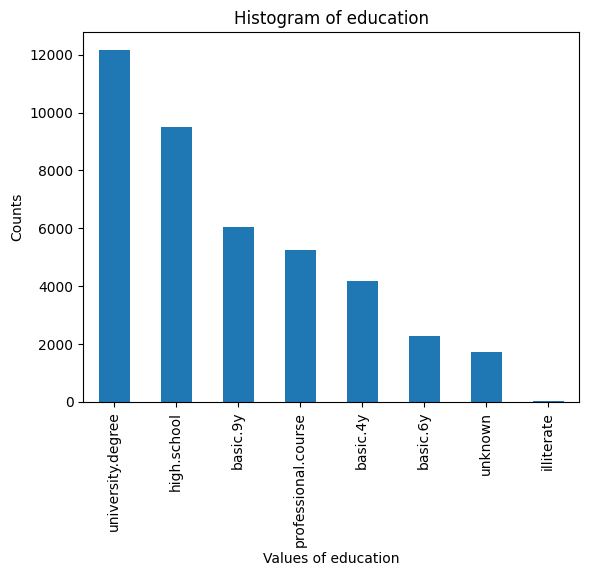

Value counts for default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64




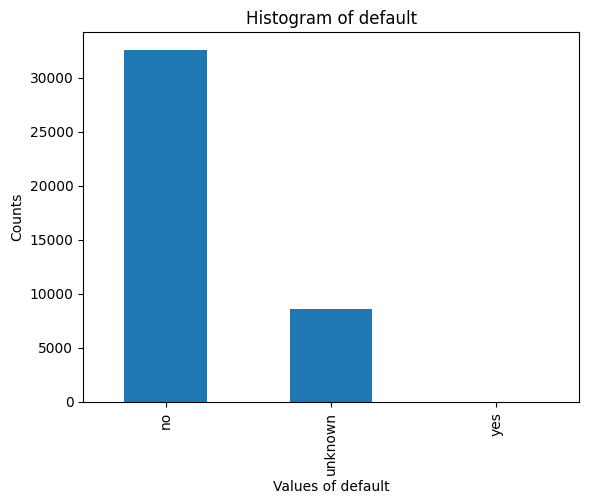

Value counts for housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64




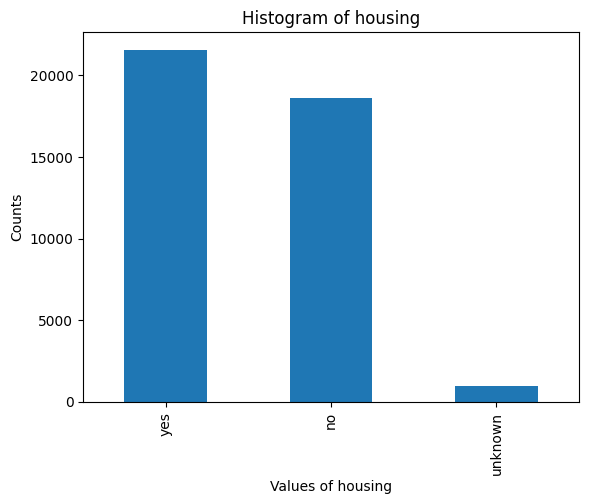

Value counts for loan:
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64




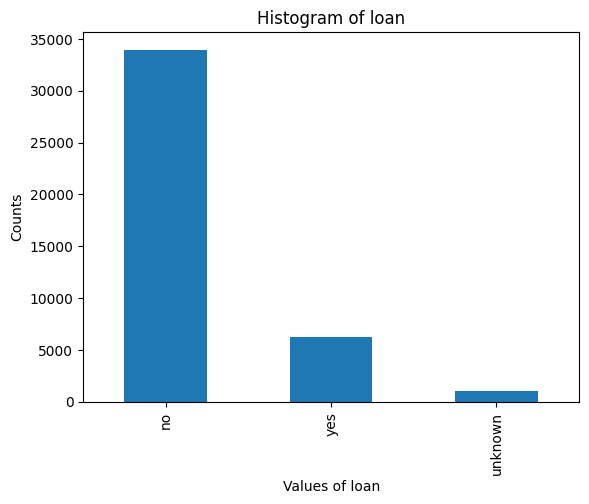

Value counts for contact:
contact
cellular     26144
telephone    15044
Name: count, dtype: int64




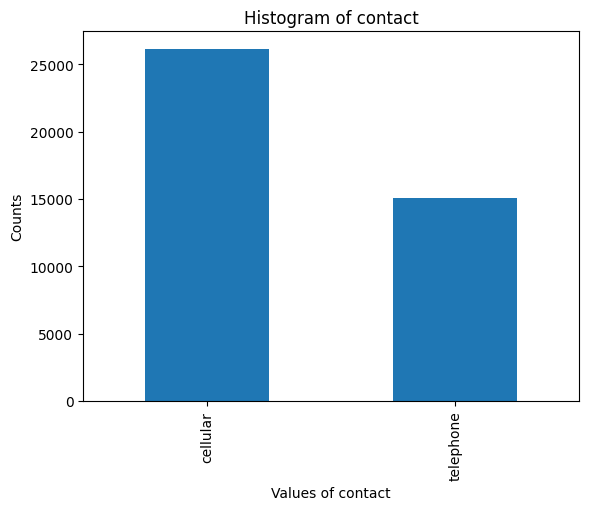

Value counts for month:
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64




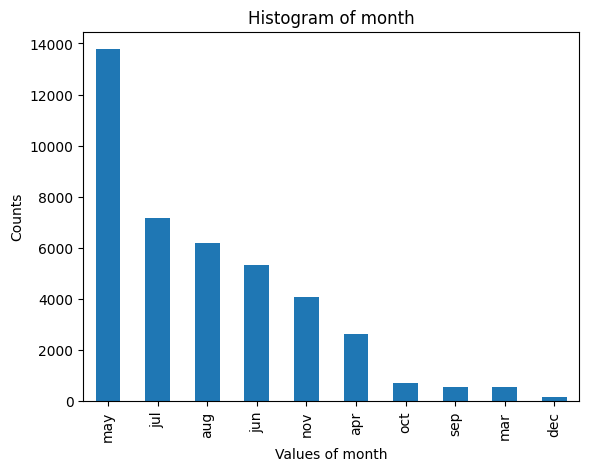

Value counts for day_of_week:
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64




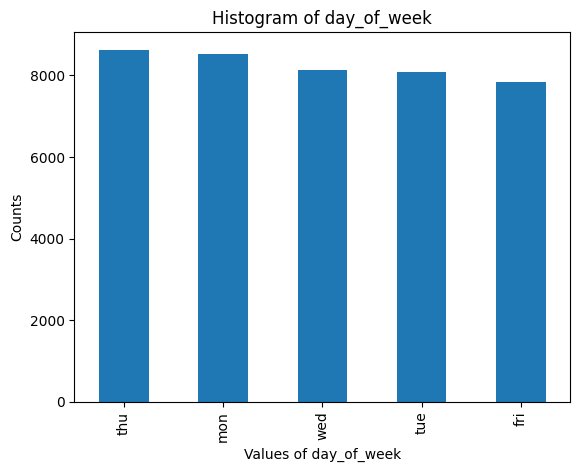

Value counts for poutcome:
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64




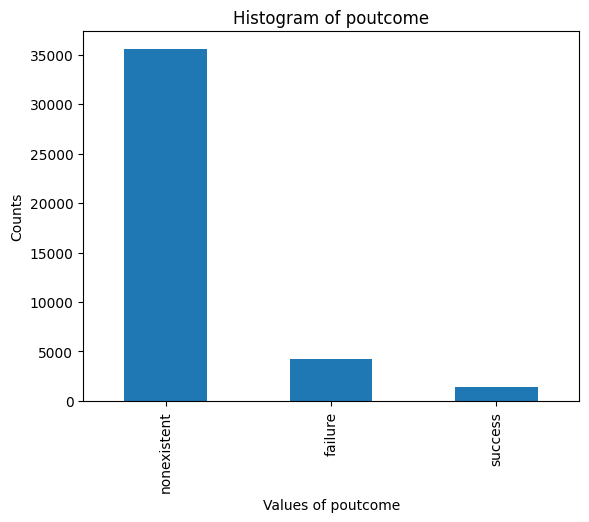

Value counts for subscribed:
subscribed
no     36548
yes     4640
Name: count, dtype: int64




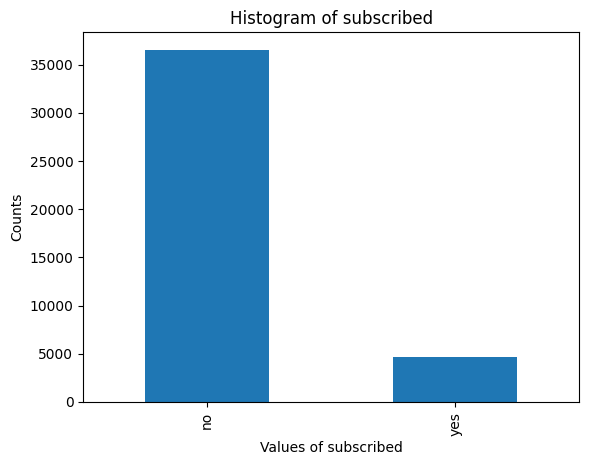

In [63]:
non_numeric_cols = df.select_dtypes(include=["object"]).columns

for col in non_numeric_cols:
    # Print value counts
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")
    
    # Plotting histogram
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Histogram of {col}")
    plt.ylabel('Counts')
    plt.xlabel(f'Values of {col}')
    plt.show()

# Looking at numerical variables

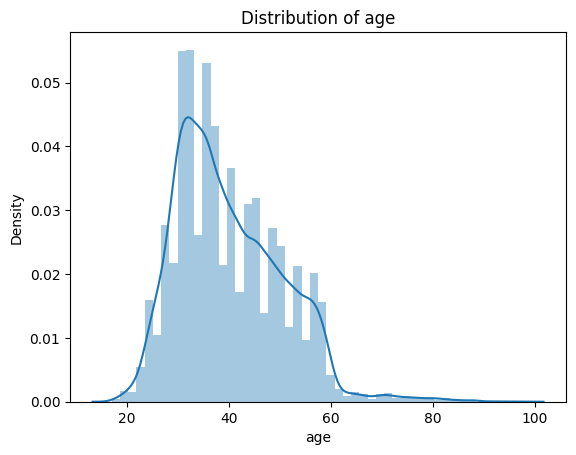

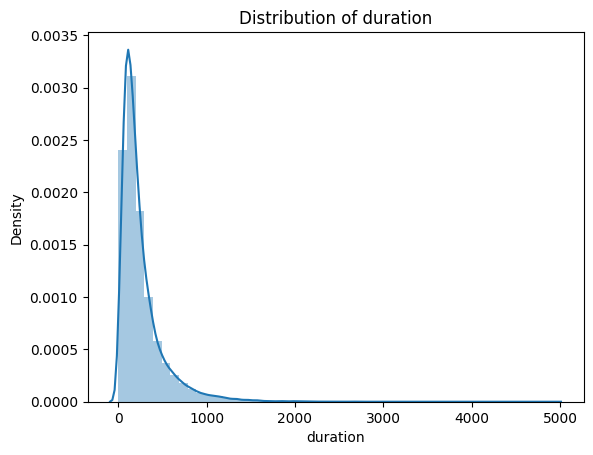

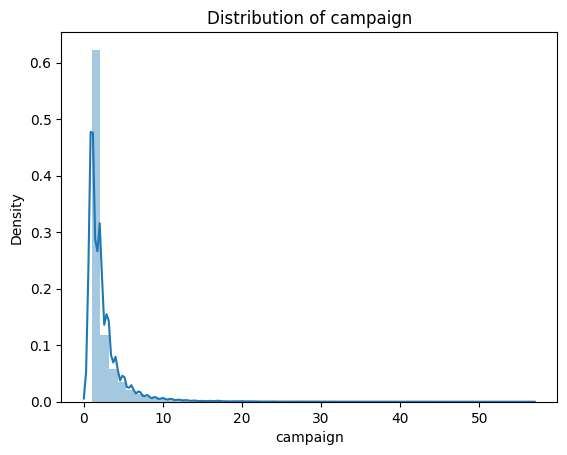

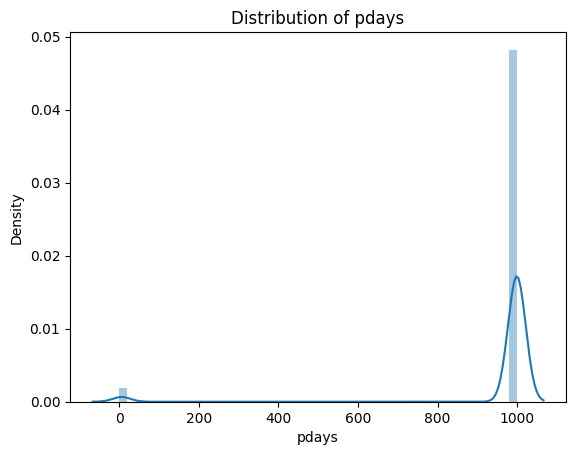

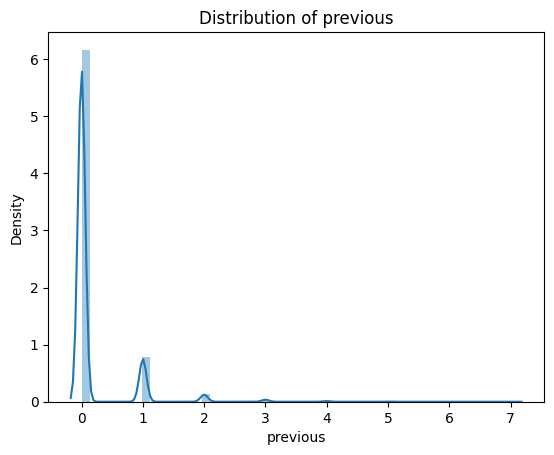

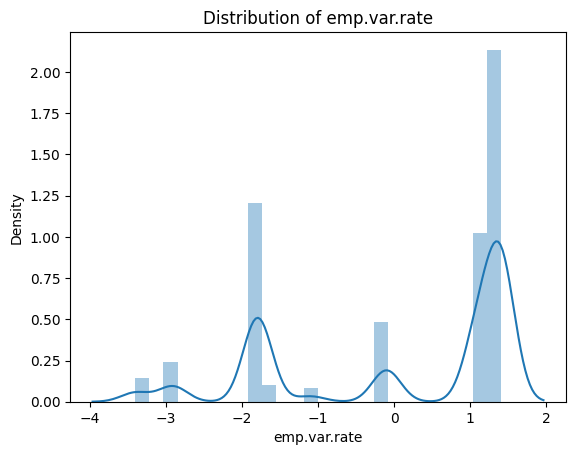

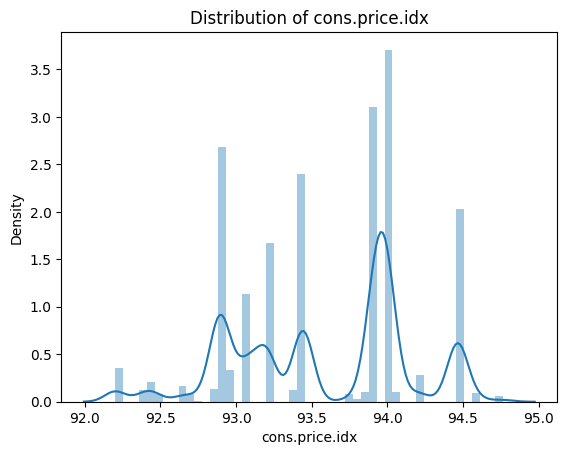

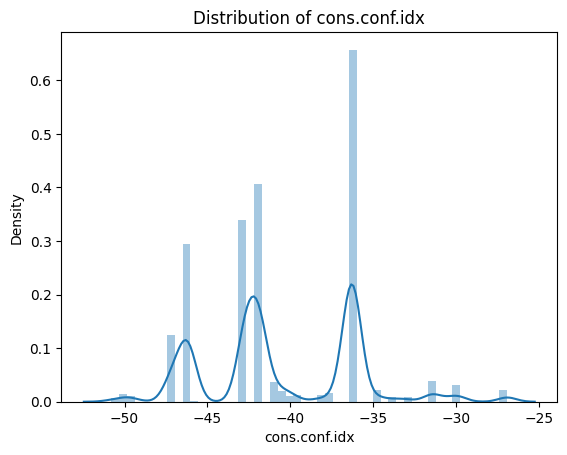

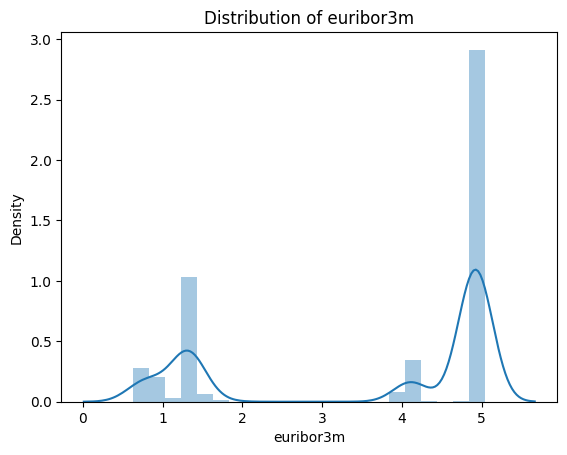

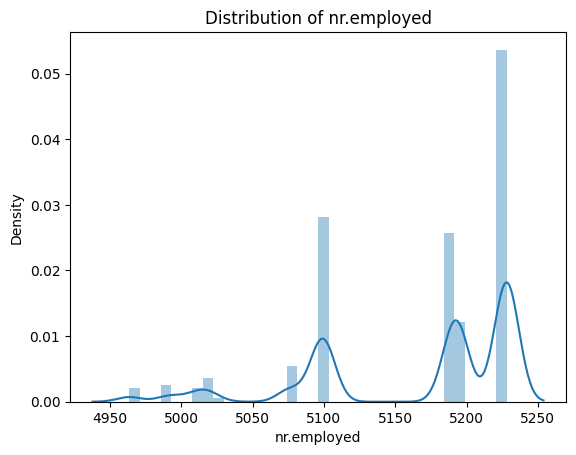

In [64]:
# list of numerical values, plot distribution

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    # Plotting distribution
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

Duration and Campaign are skewed

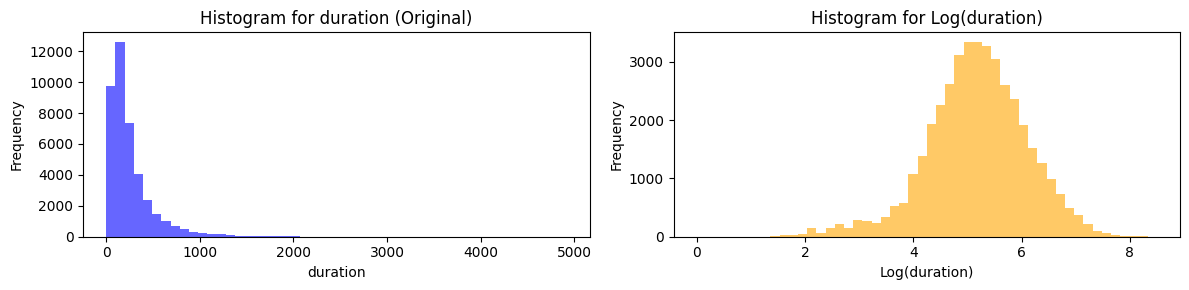

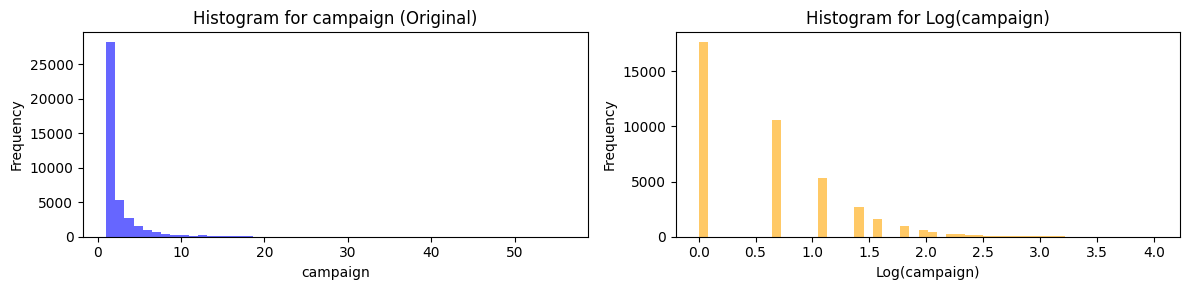

In [65]:
Skewed_columns = ['duration', 'campaign']

for col in Skewed_columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))
    
    # Plot the original variable, dropping NaN values for the plot
    axs[0].hist(df[col].dropna(), bins=50, color='blue', alpha=0.6)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Histogram for {col} (Original)")

    positive_col = df[col].dropna()
    positive_col = positive_col[positive_col > 0]

    # Plot the log-transformed variable, also dropping NaN values
    axs[1].hist(np.log(positive_col), bins=50, color='orange', alpha=0.6)
    axs[1].set_xlabel(f"Log({col})")
    axs[1].set_ylabel("Frequency")
    axs[1].set_title(f"Histogram for Log({col})")
    
    plt.tight_layout()
    plt.show()


Duration should be log transformed

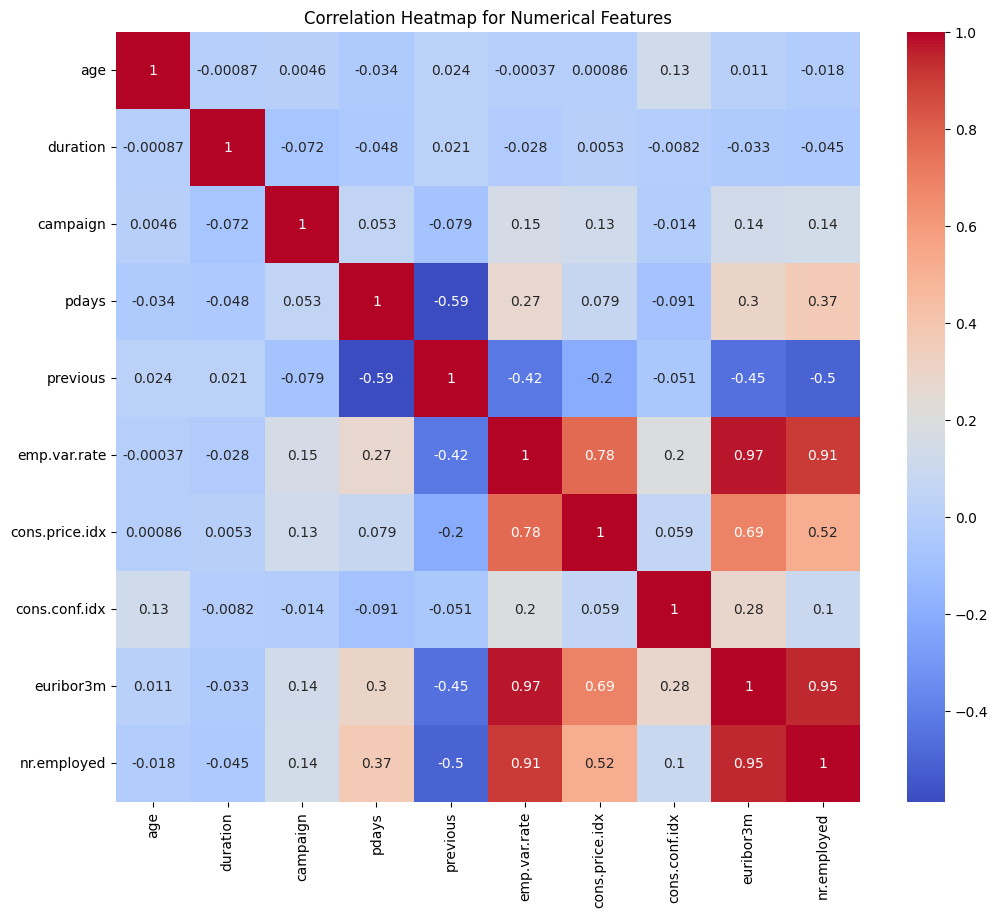

In [66]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## Outlier Detection

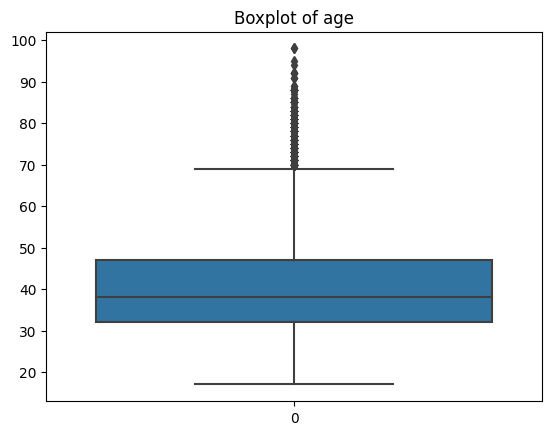

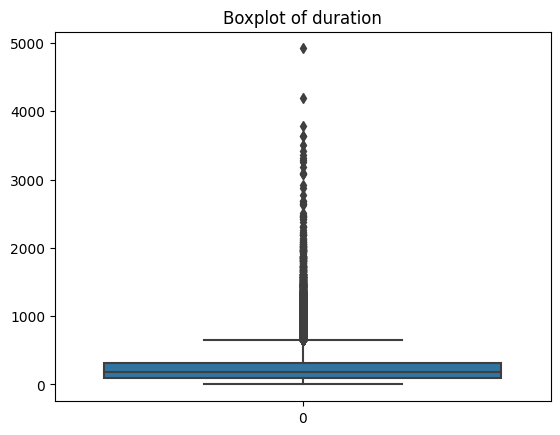

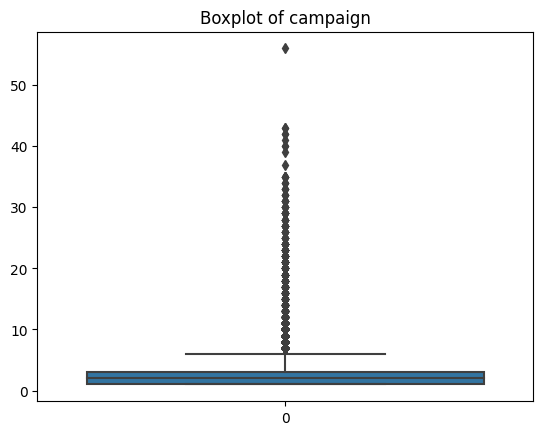

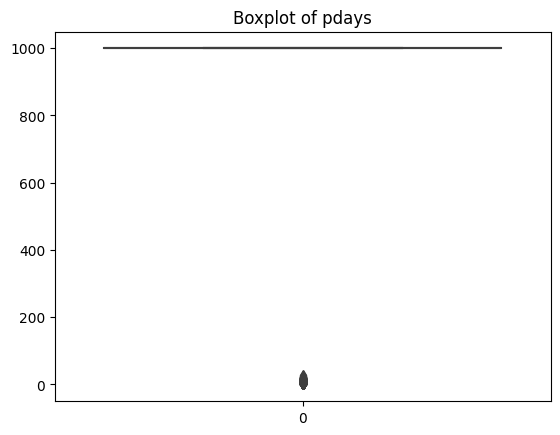

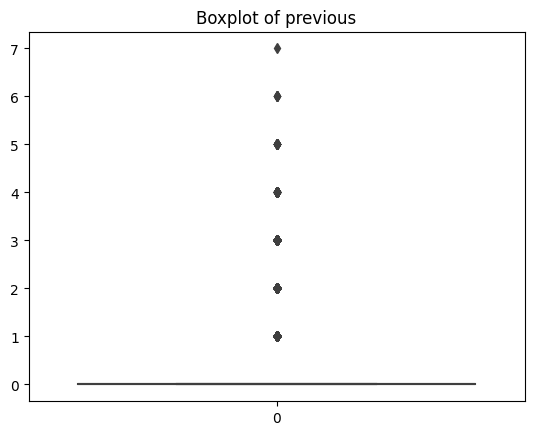

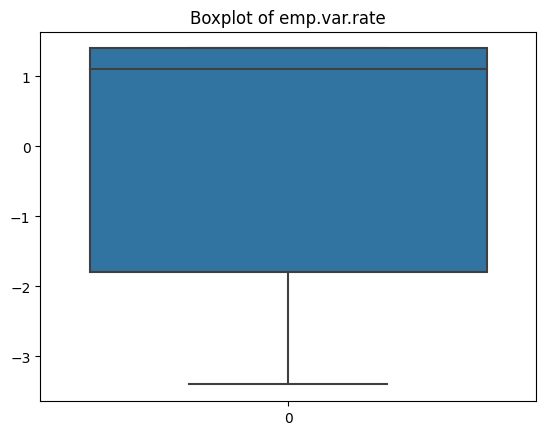

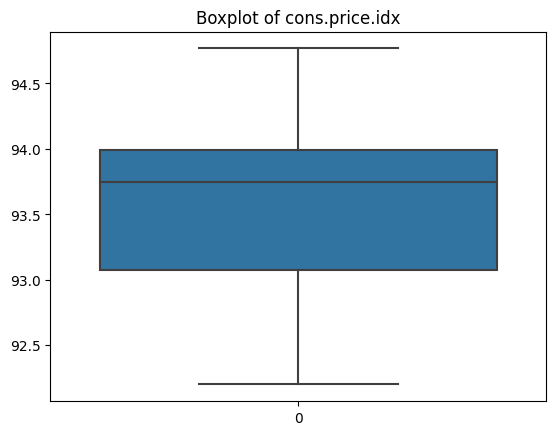

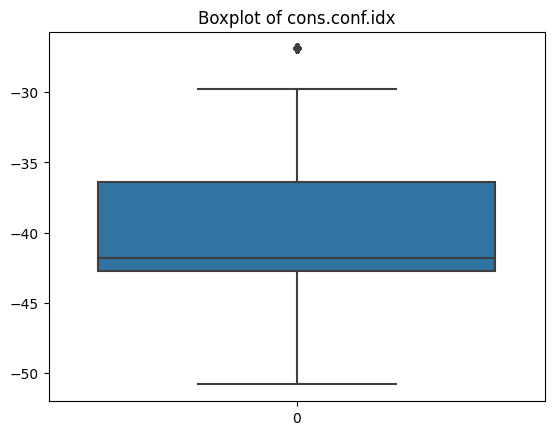

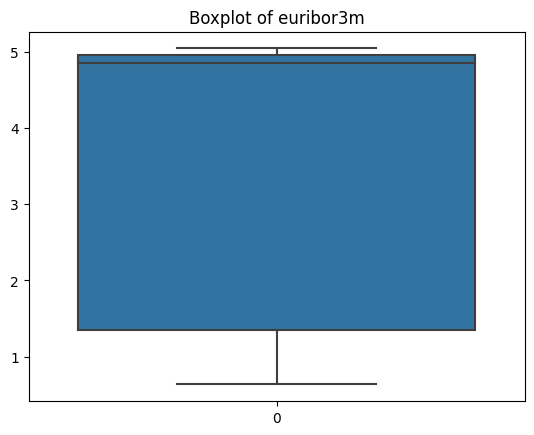

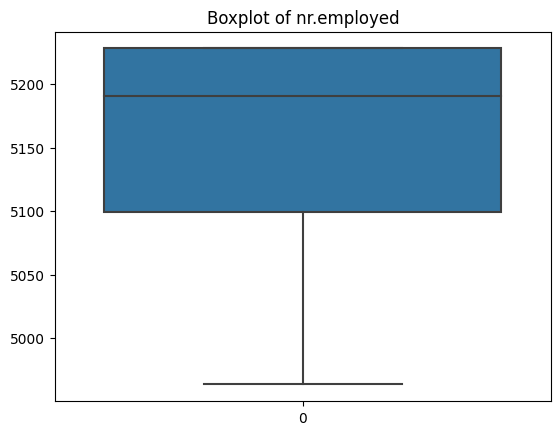

In [67]:
# Outlier detection using boxplot

for col in numeric_cols:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [68]:

# Outlier detection using z-score
    
from scipy import stats

z = np.abs(stats.zscore(df[numeric_cols]))
threshold = 3
outliers = np.where(z > threshold)
outliers

(array([   37,    75,    83, ..., 41182, 41183, 41187], dtype=int64),
 array([1, 1, 1, ..., 3, 0, 0], dtype=int64))

# Preprocessing for classification

Copy is this part for your script if needed

## Using Pipelines

In [69]:
df_classification = df.copy()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer 

In [71]:
X = df_classification.drop('subscribed', axis=1)
y = df_classification['subscribed']

# Train, Validation and Test Split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=0)


In [72]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
duration_col = ['duration']  # Column to log transform

In [73]:
# Log transforming duration
duration_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p))  # Adds 1 to duration and applies log (log1p)
])

In [74]:
# scaling transformer for numerical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [75]:
# one-hot encoding transformer for categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [76]:
preprocessor_classification = ColumnTransformer(
    transformers=[
        ('duration', duration_transformer, duration_col),
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [77]:
# Applying the preprocessor to each set
X_train_preprocessed = preprocessor_classification.fit_transform(X_train)
X_valid_preprocessed = preprocessor_classification.transform(X_valid)
X_test_preprocessed = preprocessor_classification.transform(X_test)

print(X_train_preprocessed.shape)
print(X_valid_preprocessed.shape)
print(X_test_preprocessed.shape)

(24712, 63)
(8238, 63)
(8238, 63)


## No pipeline (using a dataframe)

In [78]:
X_train['duration'] = np.log1p(X_train['duration'])
X_valid['duration'] = np.log1p(X_valid['duration'])
X_test['duration'] = np.log1p(X_test['duration'])

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols), 
                                   index=X_train.index)
X_valid_cat_encoded = pd.DataFrame(encoder.transform(X_valid[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols), 
                                   index=X_valid.index)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), 
                                  columns=encoder.get_feature_names_out(categorical_cols), 
                                  index=X_test.index)

X_train.drop(columns=categorical_cols, inplace=True)
X_valid.drop(columns=categorical_cols, inplace=True)
X_test.drop(columns=categorical_cols, inplace=True)

X_train_preprocessed_df = pd.concat([X_train, X_train_cat_encoded], axis=1)
X_valid_preprocessed_df = pd.concat([X_valid, X_valid_cat_encoded], axis=1)
X_test_preprocessed_df = pd.concat([X_test, X_test_cat_encoded], axis=1)

print(X_train_preprocessed_df.shape)
print(X_valid_preprocessed_df.shape)
print(X_test_preprocessed_df.shape)

X_train_preprocessed_df.head()


(24712, 62)
(8238, 62)
(8238, 62)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
30566,1.539276,0.550296,0.155232,0.194747,1.710302,-1.197891,-1.181578,-1.233674,-1.310805,-0.942694,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
37038,-0.666694,0.418899,-0.567398,0.194747,-0.347289,-1.896828,-1.913306,1.488240,-1.489615,-1.259669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14946,-1.050341,0.776500,1.600491,0.194747,-0.347289,0.835381,0.587338,-0.477587,0.767419,0.842887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15966,-1.242164,0.776500,0.155232,0.194747,-0.347289,0.835381,0.587338,-0.477587,0.769149,0.842887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
37481,0.580159,-0.069093,-0.567398,0.194747,-0.347289,-1.896828,-2.375813,1.963495,-1.588248,-1.259669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Preprocessing for clustering (Best models only)
Please see other files for exploratory work on all clustering (DBSCAN, Hierarchical and tuning)

## Using Pipelines

In [139]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans

In [140]:
df_cluster = df.copy()
df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'], axis=1)

In [141]:
numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

In [142]:
preprocessor_cluster = ColumnTransformer(
    transformers=[
        ('duration', duration_transformer, duration_col),
        ('num', numerical_transformer, numerical_cols_c),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Models

GMM

In [143]:
pipeline_gmm = Pipeline(steps=[
    ('preprocessor', preprocessor_cluster),
    ('clustering', GaussianMixture(n_components=2, covariance_type='diag', init_params='k-means++', random_state=1))
])

Mean Shift

In [144]:
pipeline_ms = Pipeline(steps=[
    ('preprocessor', preprocessor_cluster),
    ('clustering', MeanShift())
])

K-means

In [145]:
pipeline_kmeans = Pipeline(steps=[
    ('preprocessor', preprocessor_cluster),
    ('clustering', KMeans(n_clusters=5, random_state=1))
])

## Fitting and getting labels for each

In [146]:
pipeline_gmm.fit(df_cluster)
pipeline_ms.fit(df_cluster)
pipeline_kmeans.fit(df_cluster)

cluster_labels_gmm = pipeline_gmm.predict(df_cluster)
cluster_labels_ms = pipeline_ms.predict(df_cluster)
cluster_labels_kmeans = pipeline_kmeans.predict(df_cluster)

df_cluster_results = df_cluster.copy()

df_cluster_results['cluster_gmm'] = cluster_labels_gmm
df_cluster_results['cluster_ms'] = cluster_labels_ms
df_cluster_results['cluster_kmeans'] = cluster_labels_kmeans

df_cluster_results.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,subscribed,cluster_gmm,cluster_ms,cluster_kmeans
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no,1,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no,1,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no,1,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no,1,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no,1,0,1


## Pickle each model

In [ ]:
import joblib

joblib.dump(pipeline_gmm, 'pipeline_gmm.pkl')
joblib.dump(pipeline_ms, 'pipeline_ms.pkl')
joblib.dump(pipeline_kmeans, 'pipeline_kmeans.pkl')

## No Pipeline (using a dataframe)

In [147]:
X_preprocessed_df = df_cluster.copy()

X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols), 
                                   index=X_preprocessed_df.index)

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Best models results and visuals

In [148]:
# Keeping only continuous variables
X_cluster = X_preprocessed_df.copy()

prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

# Keeping only one-hot encoded variables
X_cluster = X_preprocessed_df.drop(one_hot_cols, axis=1)

X_cluster.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246


## GMM

In [149]:
from sklearn.mixture import GaussianMixture         

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score 

# all scores for best parameters
GMM = GaussianMixture (n_components = 2 , random_state = 1 , covariance_type = 'diag', init_params='k-means++')
GMM.fit (X_cluster)
gmmV = df_cluster.copy ()
gmmV['cluster'] = GMM.predict (X_cluster)


print ('silhouette_score : ' , silhouette_score (X_cluster , GMM.predict(X_cluster)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (X_cluster, GMM.predict(X_cluster)))
print ('davies_bouldin_score : ' , davies_bouldin_score (X_cluster, GMM.predict(X_cluster)))

silhouette_score :  0.3602813465255337
calinski_harabasz_score :  8465.606260925839
davies_bouldin_score :  1.619821778350159


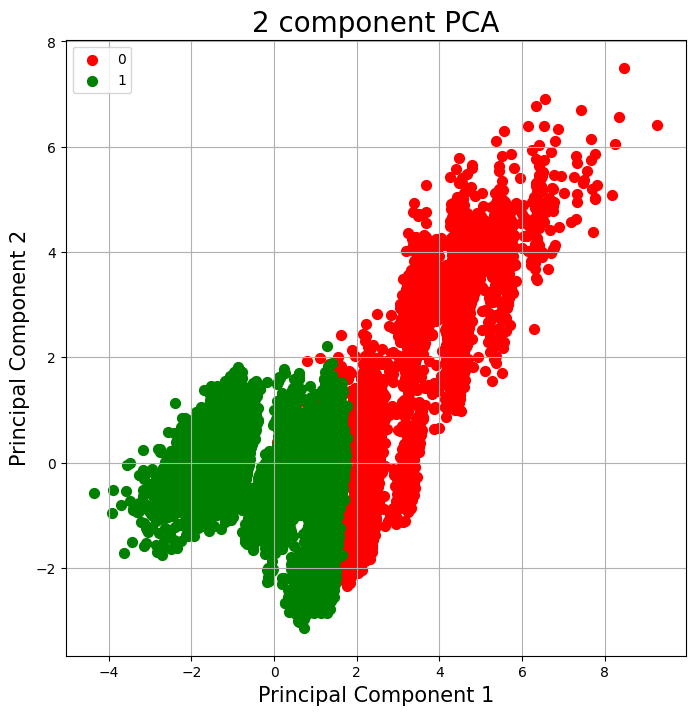

In [150]:
# Visualizing the clusters using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_cluster)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, gmmV[['cluster']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [151]:
# Print unscaled centroids
used_columns = X_cluster.columns
centroids_unscaled = pd.DataFrame(scaler.inverse_transform(GMM.means_), columns=used_columns)
print(centroids_unscaled)

         age  duration  campaign       pdays      previous  cons.price.idx  \
0  40.453200  5.256641  1.957155  731.556305  1.266487e+00       93.132828   
1  39.956183  5.159812  2.664146  999.000000  6.661338e-16       93.645708   

   cons.conf.idx  euribor3m  
0     -41.663079   1.491312  
1     -40.319047   3.958190  


In [152]:
df_cluster['cluster'] = GMM.predict(X_cluster)
for col in categorical_cols:
    print(df_cluster.groupby(['cluster', col]).size() / df_cluster.groupby('cluster').size())

cluster  job          
0        admin.           0.270044
         blue-collar      0.178667
         entrepreneur     0.031822
         housemaid        0.019911
         management       0.075733
         retired          0.068978
         self-employed    0.031111
         services         0.092089
         student          0.049956
         technician       0.147378
         unemployed       0.027733
         unknown          0.006578
1        admin.           0.250344
         blue-collar      0.231955
         entrepreneur     0.035908
         housemaid        0.026657
         management       0.070242
         retired          0.037455
         self-employed    0.035036
         services         0.097039
         student          0.016703
         technician       0.166296
         unemployed       0.024126
         unknown          0.008239
dtype: float64
cluster  marital 
0        divorced    0.112178
         married     0.552356
         single      0.332267
         unkno

## Mean Shift

In [153]:
from sklearn.cluster import MeanShift

MS = MeanShift ()
MS.fit (X_cluster)
labels = MS.labels_
len (set (labels))

6

In [154]:
print (MS.get_params())

# print scores
print ('silhouette_score : ' , silhouette_score (X_cluster , labels))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (X_cluster, labels))
print ('davies_bouldin_score : ' , davies_bouldin_score (X_cluster, labels))

{'bandwidth': None, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': None, 'seeds': None}
silhouette_score :  0.5253757683983563
calinski_harabasz_score :  2190.6908689358556
davies_bouldin_score :  1.509877065533087


In [155]:
# print cluster counts
print (pd.Series(labels).value_counts())

0    39600
1     1441
2       67
4       40
3       35
5        5
Name: count, dtype: int64


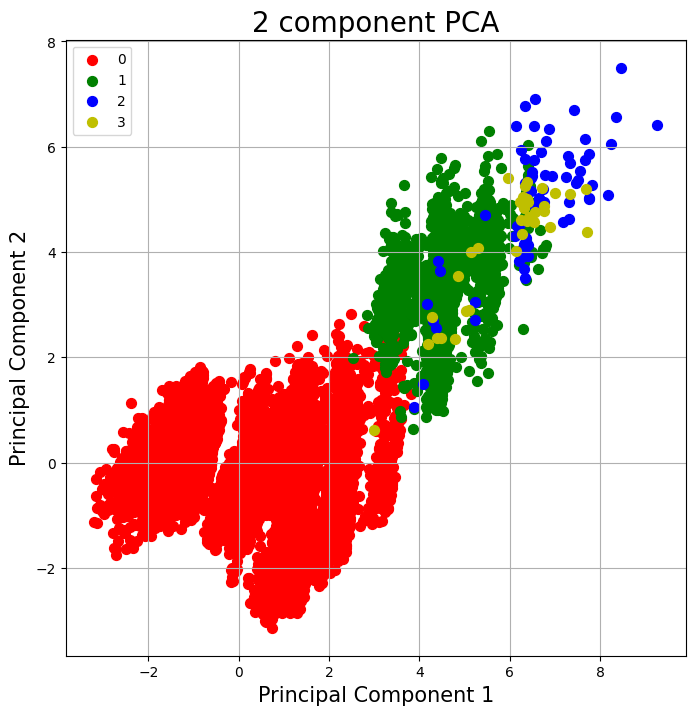

In [156]:
# Visualizing the clusters using PCA for the 4 clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_cluster)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': labels})], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(labels))
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [157]:
# Analyzing the clusters

MSv = df_cluster.copy ()
MSv ['cluster'] = MS.labels_

cluster_stats = MSv.groupby('cluster').describe()
print(cluster_stats)

             age                                                     duration  \
           count       mean        std   min   25%   50%   75%   max    count   
cluster                                                                         
0        39600.0  39.955152  10.177054  17.0  32.0  38.0  47.0  98.0  39600.0   
1         1441.0  41.716169  15.207612  17.0  30.0  37.0  52.0  98.0   1441.0   
2           67.0  47.358209  18.279564  20.0  32.5  46.0  58.5  92.0     67.0   
3           35.0  34.428571   9.938889  19.0  26.5  34.0  38.0  64.0     35.0   
4           40.0  40.575000   9.164837  25.0  34.0  38.5  47.5  58.0     40.0   
5            5.0  34.600000  13.722245  26.0  29.0  29.0  30.0  59.0      5.0   

                                                                   campaign  \
               mean         std   min    25%    50%    75%     max    count   
cluster                                                                       
0        256.065758  259.193410  

In [158]:
for col in categorical_cols:
    print(MSv.groupby(['cluster', col]).size() / MSv.groupby('cluster').size())

cluster  job          
0        admin.           0.250758
         blue-collar      0.230227
         entrepreneur     0.036061
         housemaid        0.025732
         management       0.071010
         retired          0.038864
         self-employed    0.034975
         services         0.098131
         student          0.018384
         technician       0.164066
         unemployed       0.023965
         unknown          0.007828
1        admin.           0.313671
         blue-collar      0.087439
         entrepreneur     0.017349
         housemaid        0.026371
         management       0.069396
         retired          0.115892
         self-employed    0.020819
         services         0.050659
         student          0.091603
         technician       0.151284
         unemployed       0.043026
         unknown          0.012491
2        admin.           0.238806
         blue-collar      0.044776
         entrepreneur     0.014925
         housemaid        0.0447

## K-means

In [159]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X_cluster)

KMeans(n_clusters=5, random_state=1)

In [160]:
print (kmeans.get_params())

# print scores
print ('silhouette_score : ' , silhouette_score (X_cluster , labels))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (X_cluster, labels))
print ('davies_bouldin_score : ' , davies_bouldin_score (X_cluster, labels))

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 'warn', 'random_state': 1, 'tol': 0.0001, 'verbose': 0}
silhouette_score :  0.5253757683983563
calinski_harabasz_score :  2190.6908689358556
davies_bouldin_score :  1.509877065533087


In [161]:
# print cluster counts
print (pd.Series(labels).value_counts())

0    39600
1     1441
2       67
4       40
3       35
5        5
Name: count, dtype: int64


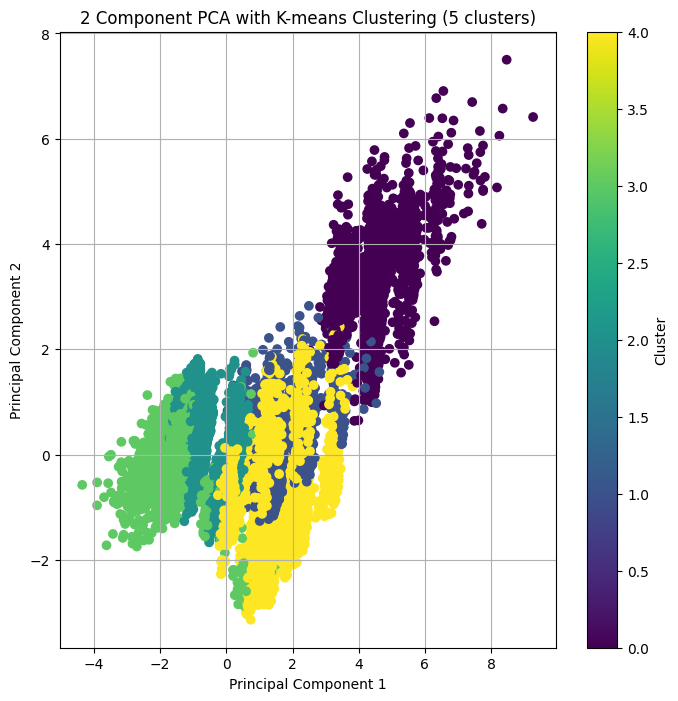

In [162]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
# Concatenate the principal components with the cluster labels
final_df = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'], c=final_df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (5 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [163]:
# Analyzing the clusters

kmeans_v = df_cluster.copy ()
kmeans_v ['cluster'] = kmeans.labels_

cluster_stats = kmeans_v.groupby('cluster').describe()
print(cluster_stats)

             age                                                     duration  \
           count       mean        std   min   25%   50%   75%   max    count   
cluster                                                                         
0         1531.0  41.883736  15.295377  17.0  30.0  37.0  52.0  98.0   1531.0   
1         2058.0  44.927600  16.521141  17.0  31.0  41.0  58.0  98.0   2058.0   
2        25715.0  40.200506   9.368661  18.0  33.0  39.0  47.0  89.0  25715.0   
3         1671.0  40.502095   9.558260  20.0  33.0  39.0  48.0  75.0   1671.0   
4        10213.0  38.234701  10.166150  18.0  31.0  36.0  44.0  95.0  10213.0   

                                                                   campaign  \
               mean         std   min    25%    50%    75%     max    count   
cluster                                                                       
0        321.376878  254.030163   1.0  165.5  253.0  392.0  3509.0   1531.0   
1        274.474733  245.217801  10

In [164]:
for col in categorical_cols:
    print(kmeans_v.groupby(['cluster', col]).size() / MSv.groupby('cluster').size())

cluster  job          
0        admin.            0.011970
         blue-collar       0.003258
         entrepreneur      0.000657
         housemaid         0.001035
         management        0.002803
         retired           0.004470
         self-employed     0.000808
         services          0.001919
         student           0.003561
         technician        0.006035
         unemployed        0.001641
         unknown           0.000505
1        admin.            0.433033
         blue-collar       0.085357
         entrepreneur      0.028452
         housemaid         0.041638
         management        0.104788
         retired           0.253990
         self-employed     0.053435
         services          0.049271
         student           0.106176
         technician        0.197085
         unemployed        0.060375
         unknown           0.014573
2        admin.           94.492537
         blue-collar      90.074627
         entrepreneur     14.373134
     

__________________________________________________________________________________________________________________________________

# Preprocessing for classification model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import janitor as jn

from seaborn import diverging_palette

In [2]:
from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

from imblearn.over_sampling import (
    SMOTE, ADASYN
)

In [3]:
df = pd.read_csv('bank_marketing_dataset.csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Create target

In [4]:
target = [
    1 if i == 'yes'
    else 0
    for i in df['subscribed']
]

df['target'] = target
df['target'].value_counts()

df.drop('subscribed', axis=1, inplace=True)

### Clean up

In [5]:
df.drop(['duration'],
        axis=1,
        inplace=True)

# this attribute highly affects the output target (e.g., if duration=0 then y='no'). 

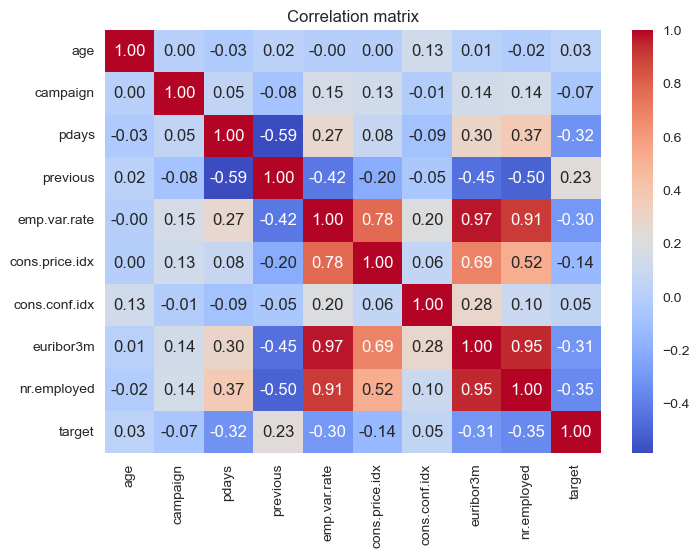

In [6]:
numerical_cols_c = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Correlation matrix
corr = df[numerical_cols_c].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [7]:
# nr.employed, euribor3m and emp.var.rate are all highly correlated. Let's only keep nr.employed
df = df.drop(columns=['euribor3m', 'emp.var.rate'])

### Label encode for categories that have less than two values

In [8]:
from sklearn import preprocessing

count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print(col)

print('%d columns were label encoded.' % count)

contact
1 columns were label encoded.


Now, contact = 1 if telephone and 0 if cellular

### One-hot encoding the rest of categorical columns

In [9]:
df = pd.get_dummies(df)
print(df.shape)

(41188, 60)


### Seperate features and target

In [10]:
#pip install pyjanitor
import janitor as jn

X, y = jn.ml.get_features_targets(df, target_columns="target")

c:\Users\olivi\anaconda3\lib\site-packages\janitor\utils.py:365: DeprecationWarning: target_columns is deprecated; use target_column_names
  warn(


### Train validation test split

In [12]:
X_train, X_val_test, y_train, y_val_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=42)

print(len(X_train))
print(len(X_val_test))
print(len(y_train))
print(len(y_val_test))

28831
12357
28831
12357


In [13]:
X_val, X_test, y_val, y_test = model_selection.train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=42)

print(len(X_val))
print(len(X_test))
print(len(y_val))
print(len(y_test))

6178
6179
6178
6179


### Standardize

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

### Balance target variable

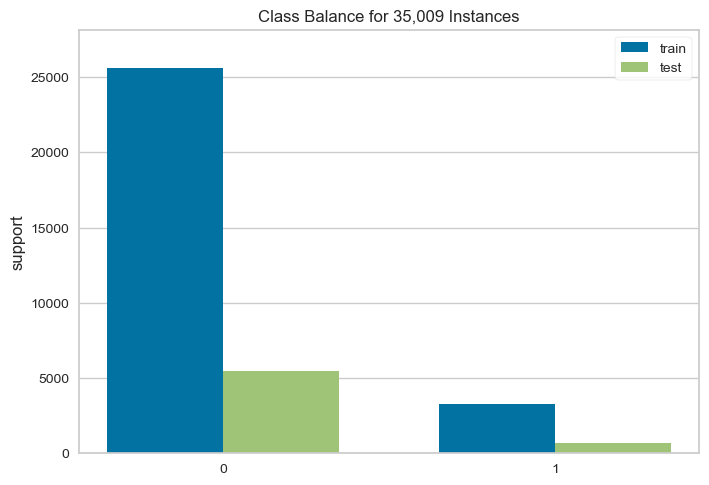

<Axes: title={'center': 'Class Balance for 35,009 Instances'}, ylabel='support'>

In [15]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_val)      
visualizer.show()      

In [16]:
# Upsample 

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

c:\Users\olivi\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\olivi\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


# Evaluation metrics

In [17]:
# ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# PR curve
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Classification score
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val)
        print("End of validation Result\n")

# Classification metrics
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

# Best model - XGBoost

See 'Classification.ipynb for more details and comparison with other models

### Train-validation

Validation Result:

accuracy score: 0.8983



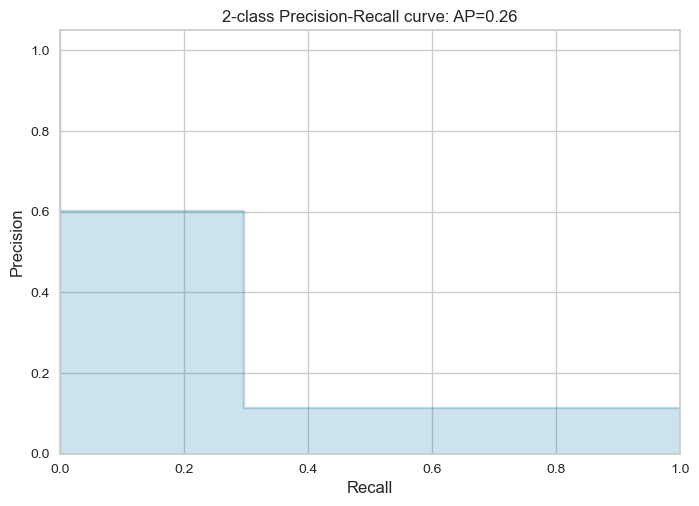

roc auc score: 0.6364058937945747



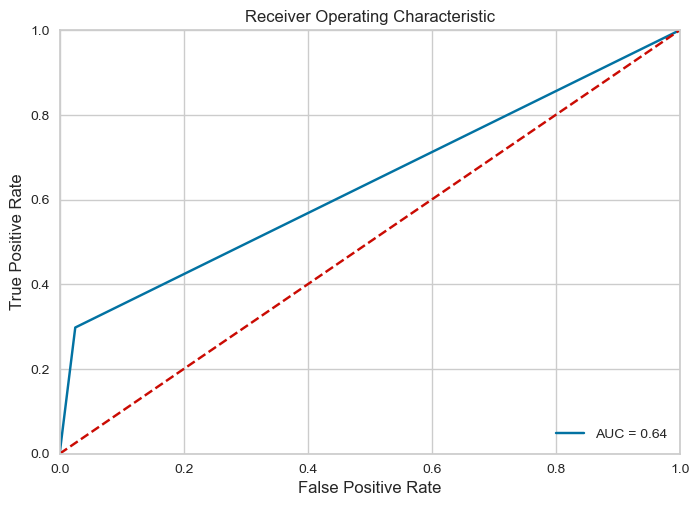

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5480
           1       0.60      0.30      0.40       698

    accuracy                           0.90      6178
   macro avg       0.76      0.64      0.67      6178
weighted avg       0.88      0.90      0.88      6178


Confusion Matrix: 
 [[5342  138]
 [ 490  208]]

End of validation Result



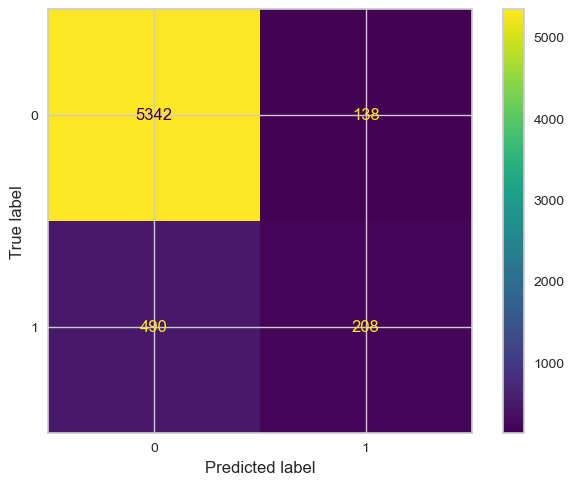

In [18]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, random_state=42, subsample=1.0)
clf_xgb.fit(X_train_sm, y_train_sm)

clf_score(clf_xgb, X_train_sm, y_train_sm, X_val, y_val, train=False)

### Test

In [19]:
from sklearn.metrics import accuracy_score, classification_report

y_test_pred = clf_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8921


In [20]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5488
           1       0.53      0.29      0.37       691

    accuracy                           0.89      6179
   macro avg       0.72      0.63      0.66      6179
weighted avg       0.87      0.89      0.88      6179



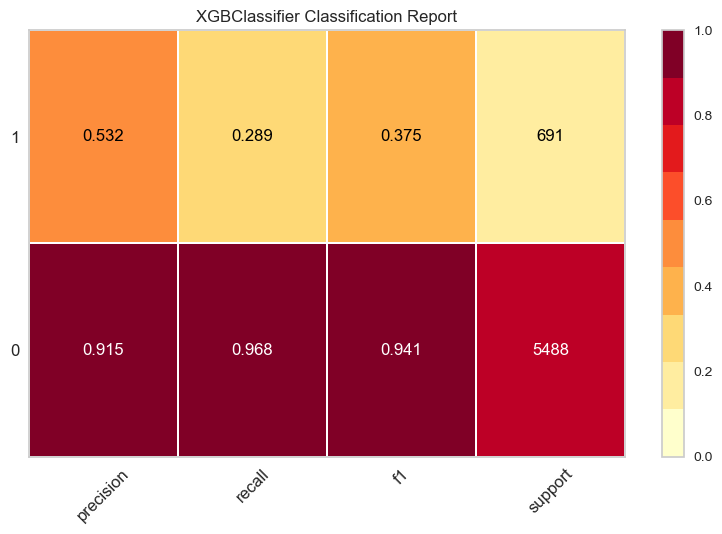

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [21]:
from yellowbrick.classifier import ClassificationReport

classes = ["0", "1"]

visualizer = ClassificationReport(
    clf_xgb, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train_sm, y_train_sm)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

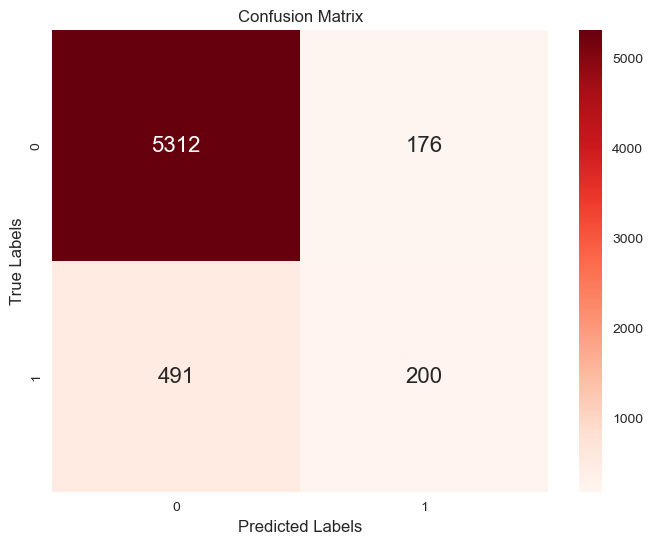

In [22]:
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

##### PR Curve

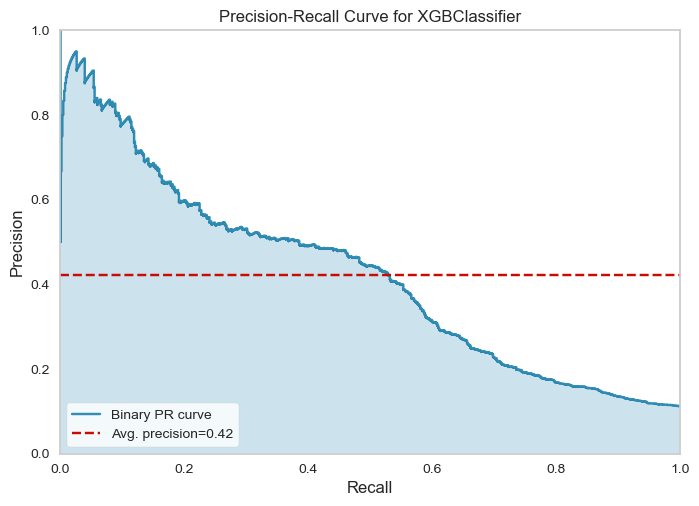

<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [23]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(clf_xgb, is_fitted=True)
viz.fit(X_train_sm, y_train_sm)
viz.score(X_test, y_test)
viz.show()

#### ROC-AUC

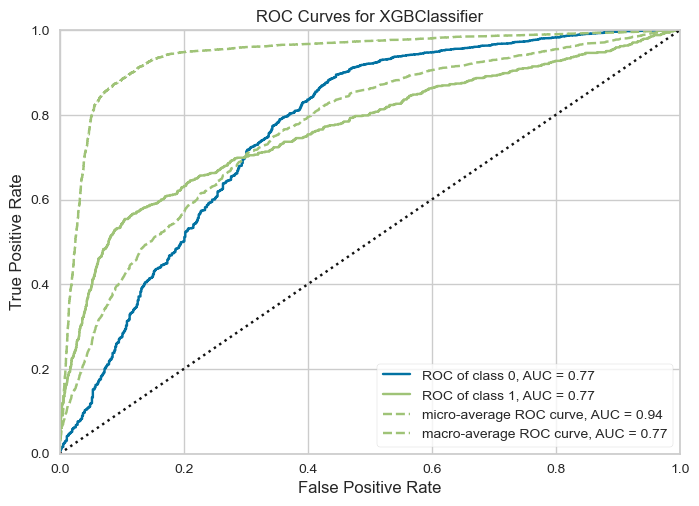

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
visualizer = ROCAUC(
    clf_xgb, classes=classes, is_fitted=True
)

visualizer.fit(X_train_sm, y_train_sm)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Validation curve

c:\Users\olivi\anaconda3\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


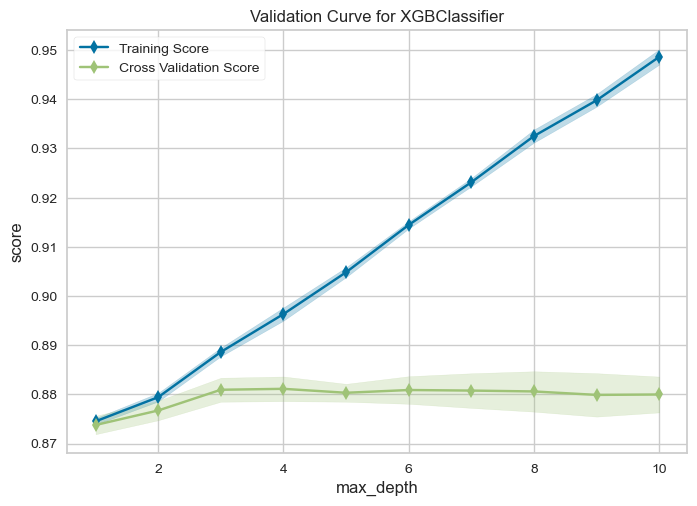

<Axes: title={'center': 'Validation Curve for XGBClassifier'}, xlabel='max_depth', ylabel='score'>

In [25]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, random_state=42, subsample=1.0), 
    param_name="max_depth",
    param_range=np.arange(1, 11), 
    cv=5, 
    scoring="f1_weighted",
    np_jobs=8
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.poof()

#### Learining curve

c:\Users\olivi\anaconda3\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


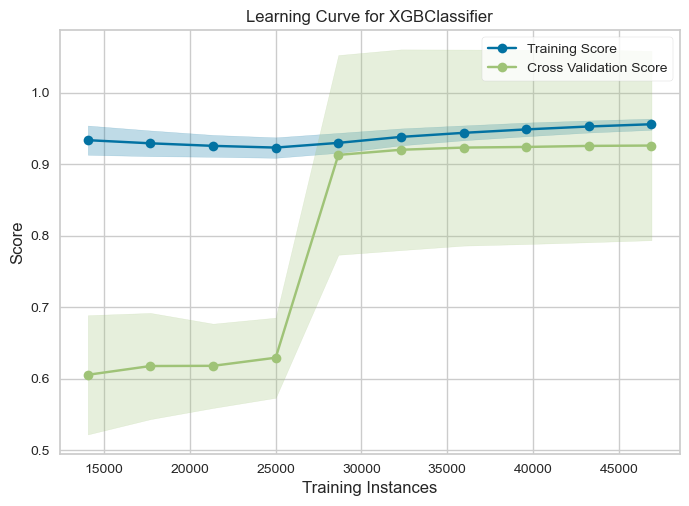

<Axes: title={'center': 'Learning Curve for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [26]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve


# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, random_state=42, subsample=1.0), 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_sm, y_train_sm)        # Fit the data to the visualizer
visualizer.poof()                       # Finalize and render the figure

#### Discrimination treshold

c:\Users\olivi\anaconda3\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


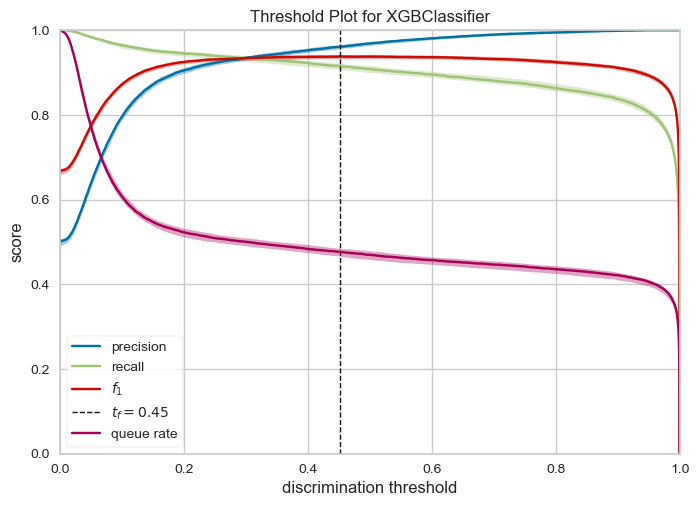

<Axes: title={'center': 'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [27]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(clf_xgb, is_fitted=True)

visualizer.fit(X_train_sm, y_train_sm)
visualizer.poof() 

#### Decision function

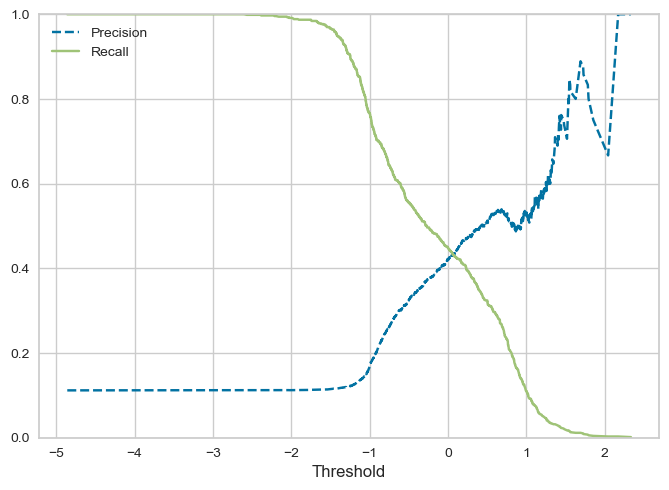

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train_sm, y_train_sm)

# call decision_function on classifier to get scores (probas_pred)
probas_pred = clf_svc.decision_function(X_test)
# compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred)
# precision and recall vs. the decision threshold
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

#### Feature importance

<Axes: >

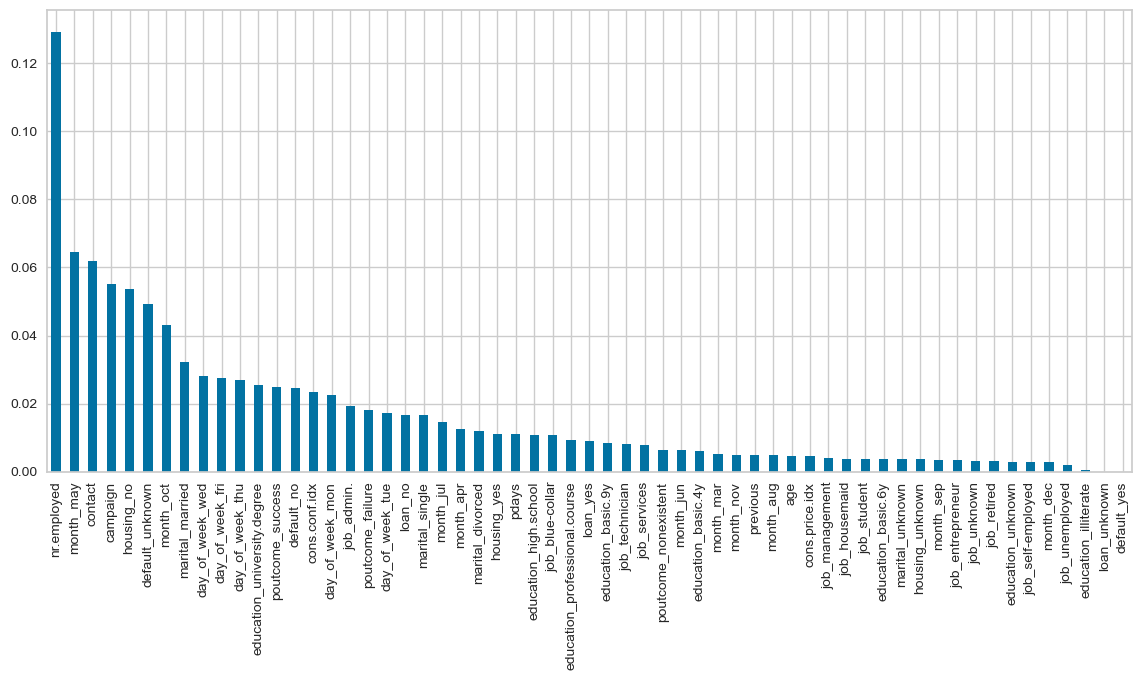

In [29]:
# Print feature importance
pd.Series(clf_xgb.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))


#### SHAP

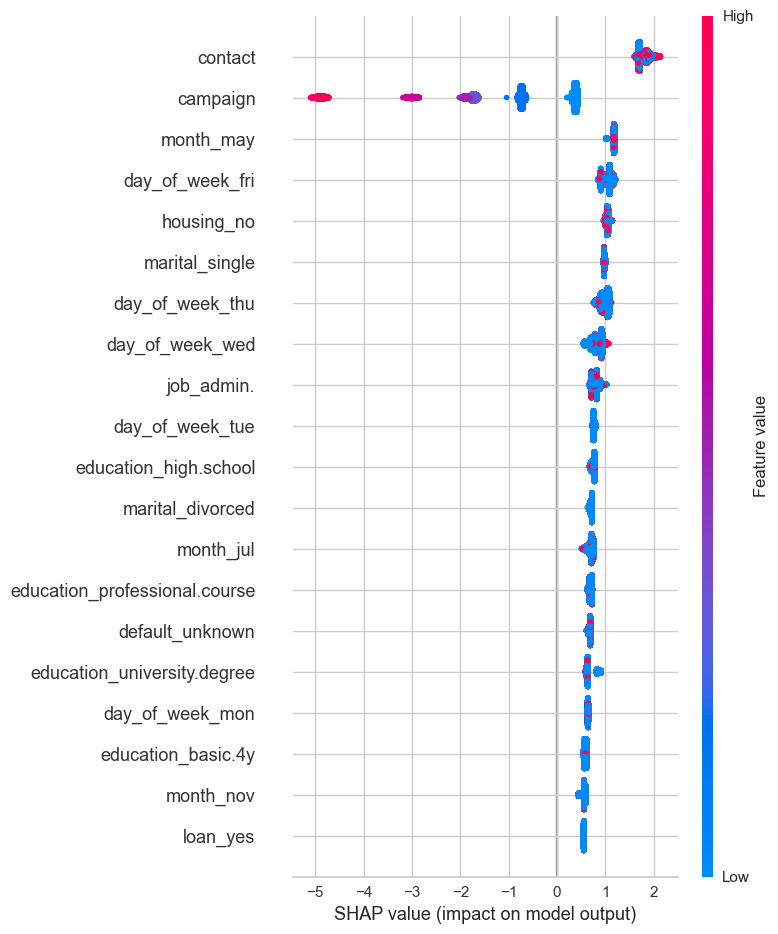

In [30]:
import shap

explainer = shap.Explainer(clf_xgb)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, feature_names=X.columns)